<div style="display:float">
  <h1 style="margin-top: 36px; font-size: 32px; float:left">Matplotlib: Visualize Classification</h1>
    <img style="vertical-align:middle; float:right" src="http://gntlearning.com/wp-content/uploads/2021/05/Small_Logo-278x64.jpg" width=250px>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

https://www.kaggle.com/unsdsn/world-happiness

In [2]:
df = pd.read_csv("2016.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

## Basic EDA plotting

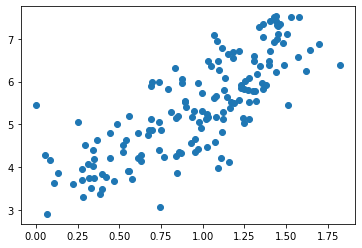

In [3]:
plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'])

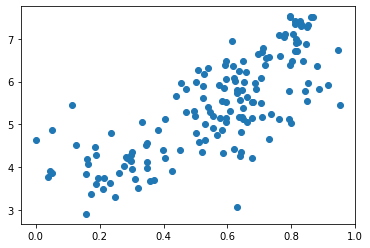

In [4]:
plt.scatter(df['Health (Life Expectancy)'], df['Happiness Score'])

In [5]:
df['Region'].value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [6]:
region_encoder = LabelEncoder()
regions = region_encoder.fit_transform(df['Region'])

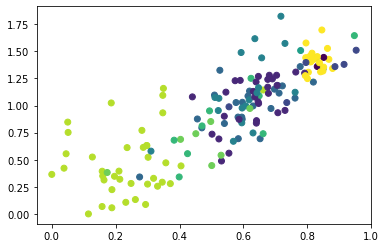

In [7]:
plt.scatter(df['Health (Life Expectancy)'], df['Economy (GDP per Capita)'], c=regions)

## Model Fitting

In [8]:
x = df[['Health (Life Expectancy)', 'Economy (GDP per Capita)']]
knn = KNeighborsClassifier(3)
knn.fit(x, regions)
knn.predict(x)

array([9, 9, 0, 4, 9, 9, 9, 0, 0, 9, 9, 9, 9, 2, 1, 9, 1, 9, 9, 9, 3, 2,
       9, 9, 3, 3, 1, 4, 3, 9, 3, 9, 1, 4, 9, 4, 2, 1, 3, 4, 4, 4, 1, 1,
       1, 3, 1, 3, 1, 0, 1, 3, 2, 1, 1, 1, 1, 2, 3, 1, 1, 9, 9, 3, 1, 1,
       4, 1, 9, 3, 1, 1, 3, 3, 9, 8, 1, 1, 1, 4, 1, 3, 1, 3, 1, 1, 1, 1,
       3, 1, 1, 7, 3, 9, 1, 3, 8, 4, 9, 7, 2, 7, 8, 1, 1, 8, 1, 1, 1, 1,
       8, 4, 3, 8, 8, 8, 3, 1, 8, 2, 1, 8, 3, 8, 8, 1, 8, 8, 1, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 3, 8])

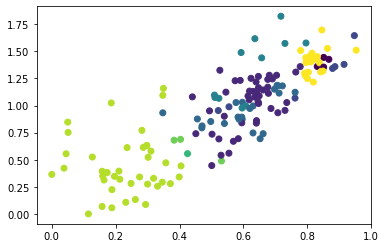

In [9]:
plt.scatter(df['Health (Life Expectancy)'], df['Economy (GDP per Capita)'], c=knn.predict(x))

## Learning How to use meshgrid

In [10]:
# np.linspace(0,1,101)

In [11]:
# np.meshgrid(range(3), range(4))

In [12]:
# xx, yy = np.meshgrid(range(3), range(4))
# list(zip(xx.reshape(-1), yy.reshape(-1)))

In [13]:
# np.asarray(np.meshgrid(range(3), range(4))).T.reshape(3*4,2)

In [14]:
x_values = np.linspace(0,1,100)
y_values = np.linspace(0,1.85,100)
coords = np.asarray(np.meshgrid(x_values, y_values)).T.reshape(-1,2)
coords

array([[0.        , 0.        ],
       [0.        , 0.01868687],
       [0.        , 0.03737374],
       ...,
       [1.        , 1.81262626],
       [1.        , 1.83131313],
       [1.        , 1.85      ]])

In [15]:
# knn.predict(coords)

## Bringing it all together

Text(0, 0.5, 'GDP per Capita')

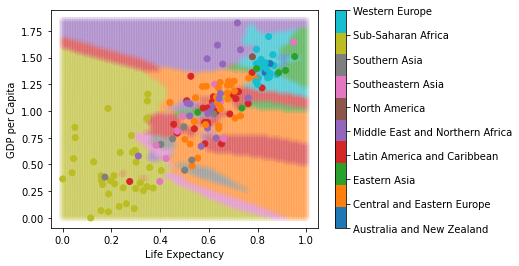

In [16]:
formatter = plt.FuncFormatter(lambda val, loc: region_encoder.classes_[val])
plt.scatter(coords[:,0], coords[:,1], c=knn.predict(coords), alpha=0.1, cmap='tab10')
plt.scatter(df['Health (Life Expectancy)'], df['Economy (GDP per Capita)'], c=regions, cmap='tab10')
plt.colorbar(ticks=range(len(region_encoder.classes_)), format=formatter)
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per Capita')